In [188]:
import math
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [189]:
group1_articles = [
    ("UN Climate Change 1", "The COP28 summit aimed to bring together world leaders to accelerate climate action."),
    ("UN Climate Change 2", "Countries are working to phase out coal and other fossil fuels to meet climate goals."),
    ("UN Climate Change 3", "The conference in Dubai focused on finding sustainable solutions for global warming.")
]

group2_articles = [
    ("Paris Agreement climate action 1",
     "The Paris Agreement set a goal to limit global temperature rise to 1.5 degrees Celsius."),
    ("Paris Agreement climate action 2",
     "Countries agreed to regularly report their greenhouse gas emissions under the agreement."),
    ("Paris Agreement climate action 3",
     "The pact encourages nations to take ambitious climate action to meet environmental targets.")
]

all_docs = [*group1_articles, *group2_articles]

In [190]:
from pprint import pprint

vector_dict = {}


def process_docs(all_dcs):
    stop_words = ['of', 'and', 'on', 'in', "to", "are", "for", "a", "their", "the"]
    all_words = []
    counts_dict = {}
    for doc in all_dcs:
        words = [x.lower() for x in doc[1].split() if x.lower() not in stop_words]
        words_counted = Counter(words)
        unique_words = list(words_counted.keys())
        counts_dict[doc[0]] = words_counted
        all_words = all_words + unique_words
    n = len(counts_dict)
    df_counts = Counter(all_words)
    compute_vector_len(counts_dict, n, df_counts)


def compute_vector_len(doc_dict, no, df_counts):
    global vector_dict
    for doc_name in doc_dict:
        doc_words = doc_dict[doc_name].keys()
        wd_tfidf_scores = {}
        for wd in list(set(doc_words)):
            wds_cts = doc_dict[doc_name]
            wd_tf_idf = wds_cts[wd] * math.log(no / df_counts[wd], 10)
            wd_tfidf_scores[wd] = round(wd_tf_idf, 4)
        vector_dict[doc_name] = wd_tfidf_scores


def get_cosine(text1, text2):
    vec1 = vector_dict[text1]
    vec2 = vector_dict[text2]
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in vec1.keys()])
    sum2 = sum([vec2[x] ** 2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return round(float(numerator) / denominator, 3)


process_docs(all_docs)
pprint(vector_dict)

{'Paris Agreement climate action 1': {'1.5': 0.7782,
                                      'agreement': 0.7782,
                                      'celsius.': 0.7782,
                                      'degrees': 0.7782,
                                      'global': 0.4771,
                                      'goal': 0.7782,
                                      'limit': 0.7782,
                                      'paris': 0.7782,
                                      'rise': 0.7782,
                                      'set': 0.7782,
                                      'temperature': 0.7782},
 'Paris Agreement climate action 2': {'agreed': 0.7782,
                                      'agreement.': 0.7782,
                                      'countries': 0.4771,
                                      'emissions': 0.7782,
                                      'gas': 0.7782,
                                      'greenhouse': 0.7782,
                                     

In [191]:
similarity112 = get_cosine("UN Climate Change 1", "UN Climate Change 2")
similarity113 = get_cosine("UN Climate Change 1", "UN Climate Change 3")
similarity123 = get_cosine("UN Climate Change 2", "UN Climate Change 3")

print("Cosine Similarity - Group 1:")
print(f"Article 1 & 2: {similarity112}")
print(f"Article 1 & 3: {similarity113}")
print(f"Article 2 & 3: {similarity123}")

Cosine Similarity - Group 1:
Article 1 & 2: 0.017
Article 1 & 3: 0.0
Article 2 & 3: 0.0


In [192]:
similarity212 = get_cosine("Paris Agreement climate action 1", "Paris Agreement climate action 2")
similarity213 = get_cosine("Paris Agreement climate action 1", "Paris Agreement climate action 3")
similarity223 = get_cosine("Paris Agreement climate action 2", "Paris Agreement climate action 3")

print("Cosine Similarity - Group 2:")
print(f"Article 1 & 2: {similarity212}")
print(f"Article 1 & 3: {similarity213}")
print(f"Article 2 & 3: {similarity223}")

Cosine Similarity - Group 2:
Article 1 & 2: 0.0
Article 1 & 3: 0.0
Article 2 & 3: 0.0


In [193]:
similarity_g12_11 = get_cosine("UN Climate Change 1", "Paris Agreement climate action 1")
similarity_g12_22 = get_cosine("UN Climate Change 2", "Paris Agreement climate action 2")
similarity_g12_33 = get_cosine("UN Climate Change 3", "Paris Agreement climate action 3")

print("Cosine Similarity - Between Groups:")
print(f"Group 1 (Article 1) & Group 2 (Article 1): {similarity_g12_11}")
print(f"Group 1 (Article 2) & Group 2 (Article 2): {similarity_g12_22}")
print(f"Group 1 (Article 3) & Group 2 (Article 3): {similarity_g12_33}")

Cosine Similarity - Between Groups:
Group 1 (Article 1) & Group 2 (Article 1): 0.0
Group 1 (Article 2) & Group 2 (Article 2): 0.044
Group 1 (Article 3) & Group 2 (Article 3): 0.0


In [194]:
data = {
    "Group": ["Group 1", "Group 1", "Group 1", "Group 2", "Group 2", "Group 2", "Group 1/2", "Group 1/2", "Group 1/2"],
    "Article Pair": ["1 & 2", "1 & 3", "2 & 3", "1 & 2", "1 & 3", "2 & 3", "1 & 1", "2 & 2", "3 & 3"],
    "Cosine Similarity": [similarity112, similarity113, similarity123, similarity212, similarity213, similarity223, similarity_g12_11, similarity_g12_22, similarity_g12_33]
}

colors = {"Group 1": "skyblue", "Group 2": "green", "Group 1/2": "red"}

df = pd.DataFrame(data)

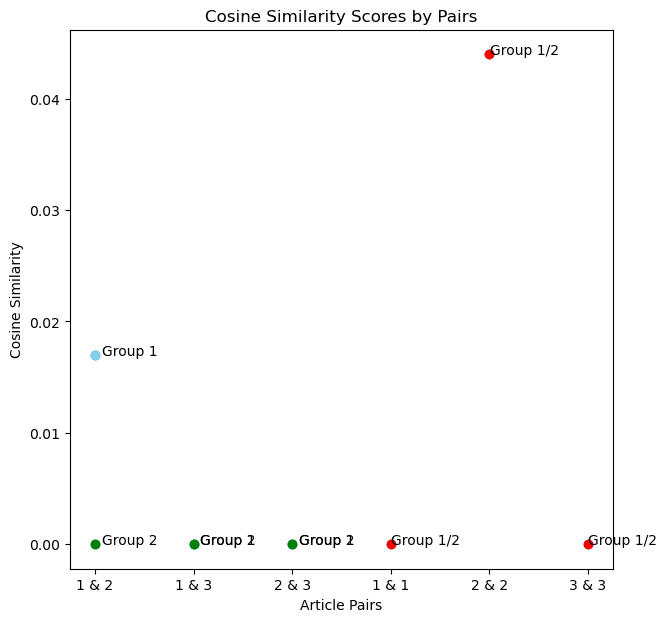

In [195]:
fig = plt.figure(figsize=(7, 7))

plt.scatter(df["Article Pair"], df["Cosine Similarity"])
for i, row in df.iterrows():
    plt.scatter(row["Article Pair"], row["Cosine Similarity"], color=colors[row["Group"]])
    plt.annotate(row["Group"], (row["Article Pair"], row["Cosine Similarity"]),
                 textcoords="offset points", xytext=(25, 0), ha='center')

plt.xlabel("Article Pairs")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity Scores by Pairs")
plt.show()

['bring climate cop28 leaders aimed world together action. accelerate summit', 'climate out coal countries fossil other working goals. meet fuels phase', 'finding focused sustainable solutions global dubai conference warming.', 'degrees goal limit temperature set paris global rise 1.5 celsius. agreement', 'gas countries under report emissions agreement. regularly greenhouse agreed', 'pact climate targets. nations ambitious environmental take action meet encourages']
Cosine Similarity Matrix:
 [[1.         0.05054818 0.         0.         0.         0.12816199]
 [0.05054818 1.         0.         0.         0.07426537 0.12369817]
 [0.         0.         1.         0.07941279 0.         0.        ]
 [0.         0.         0.07941279 1.         0.07614608 0.        ]
 [0.         0.07426537 0.         0.07614608 1.         0.        ]
 [0.12816199 0.12369817 0.         0.         0.         1.        ]]
Manhattan Distance Matrix:
 [[0.         5.99911148 5.96758023 6.29787828 6.13531094 5.

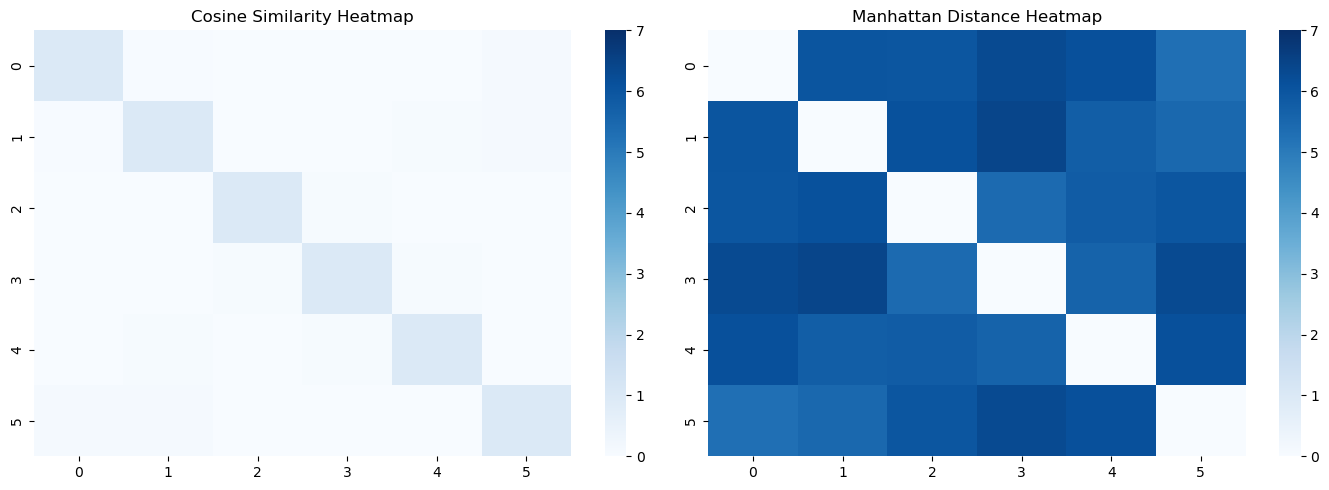

In [232]:
all_docs = [" ".join(dict_words.keys()) for dict_words in vector_dict.values()]
print(all_docs)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_docs)

cosine_sim = cosine_similarity(tfidf_matrix)
manhattan_dist = manhattan_distances(tfidf_matrix)

print("Cosine Similarity Matrix:\n", cosine_sim)
print("Manhattan Distance Matrix:\n", manhattan_dist)

fig = plt.figure(figsize=(14, 5))
fig.add_subplot(1, 2, 1)
sns.heatmap(cosine_sim, vmin=0, vmax=7, cmap="Blues")
plt.title("Cosine Similarity Heatmap")

fig.add_subplot(1, 2, 2)
sns.heatmap(manhattan_dist, vmin=0, vmax=7, cmap="Blues")
plt.title("Manhattan Distance Heatmap")
fig.tight_layout()
plt.show()